In this exercise we are going to use Boston Data

In [34]:
import pandas as pd
import numpy as np

In [35]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/Boston.csv"
BostonData = pd.read_csv(url)
del BostonData['Unnamed: 0']
BostonData.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### let's first categorize medv to 4 groups. 
Lowest 20% medv is categorized as Level 1

next 30% medv is categorized as Level 2

next 30% medv is categorized as Level 3

Top 20% medv is categorized as Level 4


In [36]:
BostonData['medvCategory'] = '1'
mask_cat2 = ((BostonData['medv'] > BostonData['medv'].quantile(.2)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.5)))   
mask_cat3 = ((BostonData['medv'] > BostonData['medv'].quantile(.5)) & 
            (BostonData['medv'] <= BostonData['medv'].quantile(.8)))  
mask_cat4 = (BostonData['medv'] > BostonData['medv'].quantile(.8)) 

BostonData.loc[mask_cat2,'medvCategory'] = '2'
BostonData.loc[mask_cat3,'medvCategory'] = '3'
BostonData.loc[mask_cat4,'medvCategory'] = '4'

#### Our goal is to predict medvCategory based on 'rm', 'ptratio' and 'lstat' 
First standardize your input (X) variables - put standardized values in new variables 'rm_st' , 'ptraio_st' and 'lstat_st'

In [37]:
# Let's write our own Standardizing function
# Alternatively we could simply Scale our data by importing preprocessing 
def Standardize(X):
    X_Max = X.max()
    X_Min = X.min()
    X_Standardized = (X - X_Min)/(X_Max - X_Min)
    return X_Standardized



In [38]:
for i in ['rm','ptratio','lstat']:
    BostonData[i] = Standardize(BostonData[i])

BostonData.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medvCategory
0,0.00632,18.0,2.31,0,0.538,0.577505,65.2,4.0900,1,296,0.287234,396.90,0.089680,24.0,3
1,0.02731,0.0,7.07,0,0.469,0.547998,78.9,4.9671,2,242,0.553191,396.90,0.204470,21.6,3
2,0.02729,0.0,7.07,0,0.469,0.694386,61.1,4.9671,2,242,0.553191,392.83,0.063466,34.7,4
3,0.03237,0.0,2.18,0,0.458,0.658555,45.8,6.0622,3,222,0.648936,394.63,0.033389,33.4,4
4,0.06905,0.0,2.18,0,0.458,0.687105,54.2,6.0622,3,222,0.648936,396.90,0.099338,36.2,4


#### Run a KNN classifier with 5 nearest neighbors and report your misclassification error. set weights to uniform

In [39]:
from sklearn import neighbors, metrics

X = BostonData[['rm','ptratio','lstat']]
y = BostonData['medvCategory']

knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
#n_neighbors is number of neighbors you would like to search 
#weights can be set to 'uniform' or 'distance'
knn.fit(X, y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
Score1 = knn.score(X, y)

y_hat = knn.predict(X)
Score2 = float(sum(y_hat == y))/len(BostonData)

print(Score1)
print(Score2)

0.786561264822
0.786561264822


Is this error reliable?

Answer: No, because it is based on the training set. 

#### Now use 10-fold cross-validation to choose the most efficient K (number of neighbors)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cross_validation


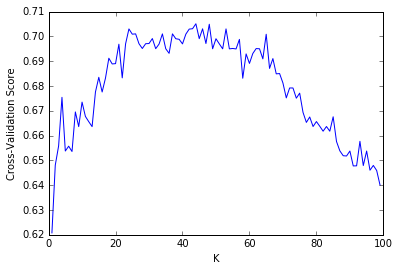

In [30]:
from sklearn.cross_validation import cross_val_score

CV_Scores = []
RangeOfK = range(1,100)

for k in RangeOfK:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
    CV_Scores.append(cross_val_score(knn, X, y, cv=10, scoring = 'accuracy').mean())    

plt.plot(RangeOfK, CV_Scores)
plt.xlabel("K")
plt.ylabel("Cross-Validation Score")
plt.show()

In [42]:
print(np.argmax(CV_Scores))
print(RangeOfK[np.argmax(CV_Scores)]) 

43
44


 Explain your findings: The highest cross-validation score is at 44 nearest neighbors

#### Train your algorithm with the optimal K you found above (don't worry if it changes from time to time - if that is the case use the one that is usually the best). After training your model with that K, Use it to predict the class of a neighborhood with rm =2, lstat = 3.5 and ptratio of 19. 

In [44]:
# We shall standardize our input first!

X = BostonData[['rm','ptratio','lstat']]
y = BostonData['medvCategory']

knn = neighbors.KNeighborsClassifier(n_neighbors=44, weights='uniform')
#n_neighbors is number of neighbors you would like to search 
#weights can be set to 'uniform' or 'distance'
knn.fit(X, y)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=44, p=2,
           weights='uniform')

In [45]:
print(knn.predict([[2,3.5,19]])) 

['1']


# Now let's run a KNN-regression model to predict MEDV based on same three Variables. At the end use the optimal model to make prediction for  Medv of a neighborhood with rm =2, lstat = 3.5 and ptratio of 19. 

In [46]:
X = BostonData[['rm','ptratio','lstat']]
y = BostonData['medv']

In [56]:
knn = neighbors.KNeighborsRegressor(n_neighbors=44, weights='uniform')
#n_neighbors is number of neighbors you would like to search 
#weights can be set to 'uniform' or 'distance'
knn.fit(X, y)
y_hat = knn.predict(X)

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline


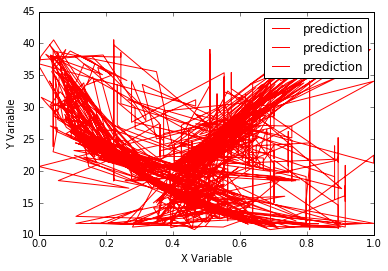